# XGBoost Model for Deal Forecast

## XGBoost Classification Model

In [1]:
# install 
!pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# XGBoost classification code 
from xgboost import XGBClassifier
import numpy as np
import warnings
warnings.filterwarnings("ignore")

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])## dataframe or numpy required after 2020
y = [0, 0, 0, 1, 1]

model = XGBClassifier(use_label_encoder=False, eval_metric='rmse')
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='rmse', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [3]:
print(model.predict(np.array([[5, 5]])))

[0]


## XGBoost Regression Model 

In [4]:
# XGBoost regression model  
from xgboost import XGBRegressor

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = [1, 2, 3, 4, 5]

model = XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [5]:
print(model.predict(np.array([[5, 5]])))

[3.0000014]


## Case: whether the mushroom is poisonous 

In [6]:
import xgboost as xgb
# read in data
xgb_train = xgb.DMatrix('XGBoost_Model_for_Deal_Forecast_Data/data/agaricus.txt.train')
xgb_test = xgb.DMatrix('XGBoost_Model_for_Deal_Forecast_Data/data/agaricus.txt.test')

params = {
    'objective': 'binary:logistic',
    'booster': 'gbtree',
    'max_depth': 3
}

num_round = 5
watchlist = [(xgb_train, 'train'), (xgb_test, 'test')]
model = xgb.train(params, xgb_train, num_round, watchlist)

[18:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.45224	test-logloss:0.45317
[1]	train-logloss:0.32281	test-logloss:0.32412
[2]	train-logloss:0.23636	test-logloss:0.23740
[3]	train-logloss:0.16933	test-logloss:0.16935
[4]	train-logloss:0.12386	test-logloss:0.12352


In [7]:
#print("Train dataset contains {0} rows and {1} columns".format(dtrain.num_row(), dtrain.num_col()))
#print("Test dataset contains {0} rows and {1} columns".format(dtest.num_row(), dtest.num_col()))

In [8]:
print("Train possible labels: ")
print(np.unique(xgb_train.get_label()))

print("\nTest possible labels: ")
print(np.unique(xgb_test.get_label()))

Train possible labels: 
[0. 1.]

Test possible labels: 
[0. 1.]


In [9]:
preds = model.predict(xgb_test)
preds

array([0.10455427, 0.8036663 , 0.10455427, ..., 0.89609396, 0.10285233,
       0.89609396], dtype=float32)

## Data Preparation 

In [10]:
import pandas as pd
table_target = pd.read_csv("XGBoost_Model_for_Deal_Forecast_Data/rawdata/table_0.csv")
table_target.columns = ['ID', 'target']
table_target.to_csv("XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/table_target.csv", index=False, encoding='utf_8_sig')
table_target.head(4)

,ID,target
0,100000000013,0
1,100000000111,0
2,100000000127,0
3,100000000231,0


In [11]:
table_target['target'].value_counts()

0    33682
1     6625
Name: target, dtype: int64

## User's Basic Information Data Precessing 

In [12]:
F1 = pd.read_csv("XGBoost_Model_for_Deal_Forecast_Data/rawdata/table_1.csv")
F1 = F1.fillna("未知")
F1.columns = ['ID', 'F1.1', 'F1.2', 'F1.3']
F1.to_csv("XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F1.csv", index=False, encoding='utf_8_sig')
F1.head(4)

,ID,F1.1,F1.2,F1.3
0,100000000013,男,未知,60后
1,100000000111,未知,上海,未知
2,100000000127,未知,上海,未知
3,100000000231,男,北京,70后


In [13]:
print(F1['F1.1'].value_counts())
print(F1['F1.2'].value_counts())
print(F1['F1.3'].value_counts())

未知    24547
女      8620
男      7140
Name: F1.1, dtype: int64
上海     9760
北京     8301
广东     4784
未知     3895
江苏     2813
浙江     2447
四川     1310
湖北      741
辽宁      725
天津      722
福建      693
重庆      617
山东      510
湖南      334
陕西      323
广西      288
云南      242
黑龙江     234
河南      228
江西      214
安徽      206
河北      203
吉林      143
贵州      143
山西      108
内蒙古      79
甘肃       69
新疆       69
海南       61
宁夏       30
青海       11
西藏        4
Name: F1.2, dtype: int64
未知     35565
80后     1667
70后     1308
60后     1061
90后      621
00后       85
Name: F1.3, dtype: int64


## User's Deal Information Data Precessing 

In [14]:
userOrder = pd.read_csv("XGBoost_Model_for_Deal_Forecast_Data/rawdata/table_2.csv")
userOrder.head(4)

,userid,orderid,orderTime,orderType,city,country,continent
0,100000000013,1000015,1481714516,0,柏林,德国,欧洲
1,100000000013,1000014,1501959643,0,旧金山,美国,北美洲
2,100000000393,1000033,1499440296,0,巴黎,法国,欧洲
3,100000000459,1000036,1480601668,0,纽约,美国,北美洲


In [15]:
import math
JPorder = userOrder[userOrder.orderType == 1]
# F2.1 deal_total
orderNum = userOrder[['userid','orderid']]
F2_1_17 = orderNum.groupby('userid',as_index=False).count()
F2_1_17.columns = ['ID','F2.1']

# F2.3 high-quality deal_total
orderType = JPorder[['userid']]
orderType['number'] = 1
orderType = orderType.groupby('userid',as_index=False).sum()
orderType = orderType.join(F2_1_17.set_index('ID'),on='userid')
# F2.4 high-quality proportion 
orderType['F2.4'] = orderType['number']/orderType['F2.1']
# F2.2 high-quality deals, whether there is high-quality deals
orderType['F2.2'] = 1
F2_2_3_4_18 = orderType[['userid','F2.2','number','F2.4']]
F2_2_3_4_18.columns = ['ID','F2.2','F2.3','F2.4']

# deal-city 
cityinfo = userOrder[['userid','city']]
cityinfo['number'] = 1
cityinfo = cityinfo.groupby(['userid','city'],as_index=False).sum()
# F2.5 cities with the highest number of trips
cityinfo1 = cityinfo.groupby('userid',as_index=False).max()
F2_5 = cityinfo1[['userid','number']]
F2_5.columns = ['ID','F2.5']

# F2.6 number of visited cities
cityinfo2 = cityinfo.groupby('userid',as_index=False).count()
F2_6 = cityinfo2[['userid','city']]
F2_6.columns = ['ID','F2.6']

# order_countries
countryinfo = userOrder[['userid','country']]
countryinfo['number'] = 1
countryinfo = countryinfo.groupby(['userid','country'],as_index=False).sum()
# F2.7 countires with the highest number of trips
countryinfo1 = countryinfo.groupby('userid',as_index=False).max()
F2_7 = countryinfo1[['userid','number']]
F2_7.columns = ['ID','F2.7']

# F2.8 number of visited countries
countryinfo2 = countryinfo.groupby('userid',as_index=False).count()
F2_8 = countryinfo2[['userid','country']]
F2_8.columns = ['ID','F2.8']

# order_continents
continentinfo = userOrder[['userid','continent']]
continentinfo['number'] = 1
continentinfo = continentinfo.groupby(['userid','continent'],as_index=False).sum()
# F2.9 continents with the highest number of trips
continentinfo1 = continentinfo.groupby('userid',as_index=False).max()
F2_9 = continentinfo1[['userid','number']]
F2_9.columns = ['ID','F2.9']

# F2.10 number of visited continents
continentinfo2 = continentinfo.groupby('userid',as_index=False).count()
F2_10 = continentinfo2[['userid','continent']]
F2_10.columns = ['ID','F2.10']

# high-quality deal_cities
JPcityinfo = JPorder[['userid','city']]
JPcityinfo['number'] = 1
JPcityinfo = JPcityinfo.groupby(['userid','city'],as_index=False).sum()
# F2.11 cities with the highest number of high-quality deals
JPcityinfo1 = JPcityinfo.groupby('userid',as_index=False).max()
F2_11 = JPcityinfo1[['userid','number']]
F2_11.columns = ['ID','F2.11']

# F2.12 number of cities(high-quality deals)
JPcityinfo2 = JPcityinfo.groupby('userid',as_index=False).count()
F2_12 = JPcityinfo2[['userid','city']]
F2_12.columns = ['ID','F2.12']

# high-quality deal_countries
JPcountryinfo = JPorder[['userid','country']]
JPcountryinfo['number'] = 1
JPcountryinfo = JPcountryinfo.groupby(['userid','country'],as_index=False).sum()
# F2.13 countries with the highest number of high-quality deals
JPcountryinfo1 = JPcountryinfo.groupby('userid',as_index=False).max()
F2_13 = JPcountryinfo1[['userid','number']]
F2_13.columns = ['ID','F2.13']

# F2.14 number of countries(high-quality deals)
JPcountryinfo2 = JPcountryinfo.groupby('userid',as_index=False).count()
F2_14 = JPcountryinfo2[['userid','country']]
F2_14.columns = ['ID','F2.14']

# order-continents
JPcontinentinfo = JPorder[['userid','continent']]
JPcontinentinfo['number'] = 1
JPcontinentinfo = JPcontinentinfo.groupby(['userid','continent'],as_index=False).sum()
# F2.15 continents with the highest number of high-quality deals
JPcontinentinfo1 = JPcontinentinfo.groupby('userid',as_index=False).max()
F2_15 = JPcontinentinfo1[['userid','number']]
F2_15.columns = ['ID','F2.15']

# F2.16 number of continents(high-quality deals)
JPcontinentinfo2 = JPcontinentinfo.groupby('userid',as_index=False).count()
F2_16 = JPcontinentinfo2[['userid','continent']]
F2_16.columns = ['ID','F2.16']

# F2.17 order_time_interval
period = userOrder.orderTime.max() - userOrder.orderTime.min()
F2_1_17['F2.17'] = period/F2_1_17['F2.1']

# F2.18 high-quality deals_time_interval
JPperiod = JPorder.orderTime.max() - JPorder.orderTime.min()
F2_2_3_4_18['F2.18'] = JPperiod/F2_2_3_4_18['F2.3']

# order_highly-welcomed_cities
allcity = userOrder[['userid','city']]
topcity = allcity.groupby('city',as_index=False).count()
topcity = topcity.sort_values('userid',ascending=False).head(math.floor(len(topcity)*0.2))
topcity = topcity[['city']]
topcityOrder = topcity.join(allcity.set_index('city'),on='city')
topcityOrder['number'] = 1
# F2.20 order_highly-welcomed_cities(number of cities visited)
topcityOrder1 = topcityOrder.groupby(['userid','city'],as_index=False).sum()
topcityOrder1 = topcityOrder1.groupby('userid',as_index=False).count()
F2_19_20 = topcityOrder1[['userid','city']]
F2_19_20.columns = ['ID','F2.20']

# F2.19 order_highly-welcomed_cities _visit or not 
F2_19_20['F2.19'] = 1

# F2.21 order_highly-welcomed_cities _the number of visit
F2_21 = topcityOrder.groupby('userid',as_index=False).sum()
F2_21.columns = ['ID','F2.21']

# order_highly-welcomed_countries
allcountry = userOrder[['userid','country']]
topcountry = allcountry.groupby('country',as_index=False).count()
topcountry = topcountry.sort_values('userid',ascending=False).head(math.floor(len(topcountry)*0.2))
topcountry = topcountry[['country']]
topcountryOrder = topcountry.join(allcountry.set_index('country'),on='country')
topcountryOrder['number'] = 1
# F2.23 order_highly-welcomed_countries_number of countries visited
topcountryOrder1 = topcountryOrder.groupby(['userid','country'],as_index=False).sum()
topcountryOrder1 = topcountryOrder1.groupby('userid',as_index=False).count()
F2_22_23 = topcountryOrder1[['userid','country']]
F2_22_23.columns = ['ID','F2.23']

# F2.22 order_highly-welcomed_countries _visit or not 
F2_22_23['F2.22'] = 1

# F2.24 order_highly-welcomed_countries _the number of visit
F2_24 = topcountryOrder.groupby('userid',as_index=False).sum()
F2_24.columns = ['ID','F2.24']

# order_highly-welcomed_continents
allcontinent = userOrder[['userid','continent']]
topcontinent = allcontinent.groupby('continent',as_index=False).count()
topcontinent = topcontinent.sort_values('userid',ascending=False).head(math.floor(len(topcontinent)*0.2))
topcontinent = topcontinent[['continent']]
topcontinentOrder = topcontinent.join(allcontinent.set_index('continent'),on='continent')
topcontinentOrder['number'] = 1
# F2.26 order_highly-welcomed_continents(number of continents visited)
topcontinentOrder1 = topcontinentOrder.groupby(['userid','continent'],as_index=False).sum()
topcontinentOrder1 = topcontinentOrder1.groupby('userid',as_index=False).count()
F2_25_26 = topcontinentOrder1[['userid','continent']]
F2_25_26.columns = ['ID','F2.26']

# F2.25 order_highly-welcomed_continents _visit or not 
F2_25_26['F2.25'] = 1

# F2.27 order_highly-welcomed_continents_the number of visit
F2_27 = topcontinentOrder.groupby('userid',as_index=False).sum()
F2_27.columns = ['ID','F2.27']

# order_highly-welcomed_cities
JPallcity = JPorder[['userid','city']]
JPtopcity = JPallcity.groupby('city',as_index=False).count()
JPtopcity = JPtopcity.sort_values('userid',ascending=False).head(math.floor(len(JPtopcity)*0.2))
JPtopcity = JPtopcity[['city']]
JPtopcityOrder = JPtopcity.join(JPallcity.set_index('city'),on='city')
JPtopcityOrder['number'] = 1
# F2.29 order_highly-welcomed_cities(number of cities visited)
JPtopcityOrder1 = JPtopcityOrder.groupby(['userid','city'],as_index=False).sum()
JPtopcityOrder1 = JPtopcityOrder1.groupby('userid',as_index=False).count()
F2_28_29 = JPtopcityOrder1[['userid','city']]
F2_28_29.columns = ['ID','F2.29']

# F2.28 order_highly-welcomed_cities _visit or not 
F2_28_29['F2.28'] = 1

# F2.30 order_highly-welcomed_cities_the number of visit
F2_30 = JPtopcityOrder.groupby('userid',as_index=False).sum()
F2_30.columns = ['ID','F2.30']

# order_highly-welcomed_countries
JPallcountry = JPorder[['userid','country']]
JPtopcountry = JPallcountry.groupby('country',as_index=False).count()
JPtopcountry = JPtopcountry.sort_values('userid',ascending=False).head(math.floor(len(JPtopcountry)*0.2))
JPtopcountry = JPtopcountry[['country']]
JPtopcountryOrder = JPtopcountry.join(JPallcountry.set_index('country'),on='country')
JPtopcountryOrder['number'] = 1
# F2.32 order_highly-welcomed_countries(number of countries visited)
JPtopcountryOrder1 = JPtopcountryOrder.groupby(['userid','country'],as_index=False).sum()
JPtopcountryOrder1 = JPtopcountryOrder1.groupby('userid',as_index=False).count()
F2_31_32 = JPtopcountryOrder1[['userid','country']]
F2_31_32.columns = ['ID','F2.32']

# F2.31 order_highly-welcomed_countries _visit or not 
F2_31_32['F2.31'] = 1

# F2.33 order_highly-welcomed_countries_the number of visit
F2_33 = JPtopcountryOrder.groupby('userid',as_index=False).sum()
F2_33.columns = ['ID','F2.33']

# order_highly-welcomed_continents
JPallcontinent = JPorder[['userid','continent']]
JPtopcontinent = JPallcontinent.groupby('continent',as_index=False).count()
JPtopcontinent = JPtopcontinent.sort_values('userid',ascending=False).head(math.floor(len(JPtopcontinent)*0.2))
JPtopcontinent = JPtopcontinent[['continent']]
JPtopcontinentOrder = JPtopcontinent.join(JPallcontinent.set_index('continent'),on='continent')
JPtopcontinentOrder['number'] = 1
# F2.35 order_highly-welcomed_continents(number of continents visited)
JPtopcontinentOrder1 = JPtopcontinentOrder.groupby(['userid','continent'],as_index=False).sum()
JPtopcontinentOrder1 = JPtopcontinentOrder1.groupby('userid',as_index=False).count()
F2_34_35 = JPtopcontinentOrder1[['userid','continent']]
F2_34_35.columns = ['ID','F2.35']

# F2.34 order_highly-welcomed_continents _visit or not 
F2_34_35['F2.34'] = 1

# F2.36 order_highly-welcomed_continents_the number of visit
F2_36 = JPtopcontinentOrder.groupby('userid',as_index=False).sum()
F2_36.columns = ['ID','F2.36']


F2 = F2_1_17.join(F2_2_3_4_18.set_index('ID'),on='ID')
F2 = F2.join(F2_5.set_index('ID'),on='ID')
F2 = F2.join(F2_6.set_index('ID'),on='ID')
F2 = F2.join(F2_7.set_index('ID'),on='ID')
F2 = F2.join(F2_8.set_index('ID'),on='ID')
F2 = F2.join(F2_9.set_index('ID'),on='ID')
F2 = F2.join(F2_10.set_index('ID'),on='ID')
F2 = F2.join(F2_11.set_index('ID'),on='ID')
F2 = F2.join(F2_12.set_index('ID'),on='ID')
F2 = F2.join(F2_13.set_index('ID'),on='ID')
F2 = F2.join(F2_14.set_index('ID'),on='ID')
F2 = F2.join(F2_15.set_index('ID'),on='ID')
F2 = F2.join(F2_16.set_index('ID'),on='ID')
F2 = F2.join(F2_19_20.set_index('ID'),on='ID')
F2 = F2.join(F2_21.set_index('ID'),on='ID')
F2 = F2.join(F2_22_23.set_index('ID'),on='ID')
F2 = F2.join(F2_24.set_index('ID'),on='ID')
F2 = F2.join(F2_25_26.set_index('ID'),on='ID')
F2 = F2.join(F2_27.set_index('ID'),on='ID')
F2 = F2.join(F2_28_29.set_index('ID'),on='ID')
F2 = F2.join(F2_30.set_index('ID'),on='ID')
F2 = F2.join(F2_31_32.set_index('ID'),on='ID')
F2 = F2.join(F2_33.set_index('ID'),on='ID')
F2 = F2.join(F2_34_35.set_index('ID'),on='ID')
F2 = F2.join(F2_36.set_index('ID'),on='ID')
F2 = F2[['ID','F2.1','F2.2','F2.3','F2.4','F2.5','F2.6','F2.7','F2.8','F2.9','F2.10','F2.11','F2.12','F2.13','F2.14','F2.15','F2.16','F2.17','F2.18','F2.19','F2.20','F2.21','F2.22','F2.23','F2.24','F2.25','F2.26','F2.27','F2.28','F2.29','F2.30','F2.31','F2.32','F2.33','F2.34','F2.35','F2.36']]
F2 = F2.fillna(0)

In [16]:
F2.to_csv("XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F2.csv", index=False, encoding='utf_8_sig')

## User's App Using Behaviour Analysis 

In [17]:
userAction = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/rawdata/table_3.csv')

In [18]:
# F3.1 total_number_of_action 
F3_1 = userAction.groupby('userid',as_index=False).count()
F3_1 = F3_1[['userid','actionType']]
F3_1.columns = ['ID','F3.1']

# F3.2 number_of_action of non-payment 
F3_2 = userAction[userAction.actionType < 5 ].groupby('userid',as_index=False).count()
F3_2 = F3_2[['userid','actionType']]
F3_2.columns = ['ID','F3.2']

# F3.3 number_of_action of payment 
F3_3 = userAction[userAction.actionType >= 5 ].groupby('userid',as_index=False).count()
F3_3 = F3_3[['userid','actionType']]
F3_3.columns = ['ID','F3.3']

# combination
F3 = F3_1.join(F3_2.set_index('ID'),on='ID')
F3 = F3.join(F3_3.set_index('ID'),on='ID')

F3.head(4)

,ID,F3.1,F3.2,F3.3
0,100000000013,143,85.0,58.0
1,100000000111,3,1.0,2.0
2,100000000127,6,2.0,4.0
3,100000000231,44,28.0,16.0


In [19]:
# F3.4 action1_number
# F3.5 action2_number
# F3.6 action3_number
# F3.7 action4_number
# F3.8 action5_number
# F3.9 action6_number
# F3.10 action7_number
# F3.11 action8_number
# F3.12 action9_number
a1 = 4
for i in range(1,10):
    title1 = 'F3.' + str(a1)
    action1 = userAction[userAction.actionType == i ].groupby('userid',as_index=False).count()
    action1 = action1[['userid','actionType']]
    action1.columns = ['ID',title1]
    F3 = F3.join(action1.set_index('ID'), on='ID')
    a1 = a1 + 1
F3 = F3.fillna(0)

# F3.13 proportion of non-payment actions
# F3.14 proportion of payment actions
# F3.15 proportion of action1
# F3.16 proportion of action2
# F3.17 proportion of action3
# F3.18 proportion of action4
# F3.19 proportion of action5
# F3.20 proportion of action6
# F3.21 proportion of action7
# F3.22 proportion of action8
# F3.23 proportion of action9
a2 = 13
for i in range(2,13):
    title2 = 'F3.' + str(a2)
    actiontitle = 'F3.' + str(i)
    F3[title2] = F3[actiontitle] / F3['F3.1']
    a2 = a2 + 1

timeinterval = userAction[['userid','actionTime']]
timeinterval['interval'] = timeinterval.groupby('userid').actionTime.diff()
timeinterval1 = timeinterval[['userid','interval']]

# F3.24 time_interval_mean
F3_24 = timeinterval1.groupby('userid',as_index=False).mean()
F3_24.columns = ['ID','F3.24']
F3 = F3.join(F3_24.set_index('ID'), on='ID')

# F3.25 time_interval_variance
F3_25 = timeinterval1.groupby('userid',as_index=False).var()
F3_25.columns = ['ID','F3.25']
F3 = F3.join(F3_25.set_index('ID'), on='ID')

# F3.26 time_interval_max
F3_26 = timeinterval1.groupby('userid',as_index=False).min()
F3_26.columns = ['ID','F3.26']
F3 = F3.join(F3_26.set_index('ID'), on='ID')

# F3.27 time_interval_min
F3_27 = timeinterval1.groupby('userid',as_index=False).max()
F3_27.columns = ['ID','F3.27']
F3 = F3.join(F3_27.set_index('ID'), on='ID')

# descending
top3time = timeinterval.sort_values('actionTime',ascending=False).groupby('userid',as_index=False).head(3)
top3timemax = top3time.groupby('userid').max()
# F3.28 time_interval_the last one 
F3_28 = top3time.groupby('userid',as_index=False).head(1)
F3_28 = F3_28[['userid','interval']]
# for null fulfillment 
F3_28null = F3_28.set_index('userid').isnull()
F3_28null = F3_28null[F3_28null.interval == True]
for i in F3_28null.index.values:
    max = top3timemax.at[i,"interval"]
    F3_28.loc[F3_28['userid']==i, 'interval'] = max
F3_28.columns = ['ID','F3.28']
F3 = F3.join(F3_28.set_index('ID'), on='ID')

# F3.29 time_interval_the second last one 
F3_29 = top3time.groupby('userid',as_index=False).head(2)
F3_29 = top3time.groupby('userid',as_index=False).tail(1)
F3_29 = F3_29[['userid','interval']]
# for null fulfillment 
F3_29null = F3_29.set_index('userid').isnull()
F3_29null = F3_29null[F3_29null.interval == True]
for i in F3_29null.index.values:
    max = top3timemax.at[i,"interval"]
    F3_29.loc[F3_29['userid']==i, 'interval'] = max
F3_29.columns = ['ID','F3.29']
F3 = F3.join(F3_29.set_index('ID'), on='ID')

# F3.30 time_interval_the third last one
F3_30 = top3time.groupby('userid',as_index=False).tail(1)
F3_30 = F3_30[['userid','interval']]
# for null fulfillment 
F3_30null = F3_30.set_index('userid').isnull()
F3_30null = F3_30null[F3_30null.interval == True]
for i in F3_30null.index.values:
    max = top3timemax.at[i,"interval"]
    F3_30.loc[F3_30['userid']==i, 'interval'] = max
F3_30.columns = ['ID','F3.30']
F3 = F3.join(F3_30.set_index('ID'), on='ID')

# descending
top3action = userAction.sort_values('actionTime',ascending=False).groupby('userid',as_index=False).head(3)
top3actionmax = top3action[['userid','actionType']]
top3actionmax = top3actionmax.groupby('userid').max()
# F3.31 action_the last one 
F3_31 = top3action.groupby('userid',as_index=False).head(1)
F3_31 = F3_31[['userid','actionType']]
# for null fulfillment 
F3_31null = F3_31.set_index('userid').isnull()
F3_31null = F3_31null[F3_31null.actionType == True]
for i in F3_31null.index.values:
    max = top3actionmax.at[i,"actionType"]
    F3_31.loc[F3_31['userid']==i, 'actionType'] = max
F3_31.columns = ['ID','F3.31']
F3 = F3.join(F3_31.set_index('ID'), on='ID')

# F3.32 action_the second last one 
F3_32 = top3action.groupby('userid',as_index=False).head(2)
F3_32 = top3action.groupby('userid',as_index=False).tail(1)
F3_32 = F3_32[['userid','actionType']]
# for null fulfillment 
F3_32null = F3_32.set_index('userid').isnull()
F3_32null = F3_32null[F3_32null.actionType == True]
for i in F3_32null.index.values:
    max = top3actionmax.at[i,"actionType"]
    F3_32.loc[F3_32['userid']==i, 'actionType'] = max
F3_32.columns = ['ID','F3.32']
F3 = F3.join(F3_32.set_index('ID'), on='ID')

# F3.33 action_the third last one
F3_33 = top3action.groupby('userid',as_index=False).tail(1)
F3_33 = F3_33[['userid','actionType']]
# for null fulfillment 
F3_33null = F3_33.set_index('userid').isnull()
F3_33null = F3_33null[F3_33null.actionType == True]
for i in F3_33null.index.values:
    max = top3actionmax.at[i,"actionType"]
    F3_33.loc[F3_33['userid']==i, 'actionType'] = max
F3_33.columns = ['ID','F3.33']
F3 = F3.join(F3_33.set_index('ID'), on='ID')

# F3.34 time interval_last three_ mean 
F3_34  = top3time[['userid','interval']].groupby('userid',as_index=False).mean()
F3_34.columns = ['ID','F3.34']
F3 = F3.join(F3_34.set_index('ID'), on='ID')

# F3.35 time interval_last three_variance 
F3_35  = top3time[['userid','interval']].groupby('userid',as_index=False).var()
F3_35.columns = ['ID','F3.35']
F3 = F3.join(F3_35.set_index('ID'), on='ID')

lastTime = userAction.sort_values('actionTime',ascending=False).groupby('userid',as_index=False).head(1)
lastTime = lastTime[['userid','actionTime']]
lastTime.columns = ['userid','lastTime']
lastActionTime = userAction.sort_values('actionTime',ascending=False).groupby(['userid','actionType'],as_index=False).head(1)
lastActionTime.columns = ['userid','actionType','lastActionTime']
actionType = lastActionTime
lastActionTime = lastActionTime.join(lastTime.set_index('userid'),on='userid')
lastActionTime['diff'] = lastActionTime['lastTime'] - lastActionTime['lastActionTime']
lastActionTimemax = lastActionTime[['actionType','diff']].groupby('actionType').max()

# F3.36 time interval_recently action1
# F3.37 time interval_recently action2
# F3.38 time interval_recently action3
# F3.39 time interval_recently action4
# F3.40 time interval_recently action5
# F3.41 time interval_recently action6
# F3.42 time interval_recently action7
# F3.43 time interval_recently action8
# F3.44 time interval_recently action9
a3 = 36
for i in range(1,10):
    title3 = 'F3.' + str(a3)
    action3 = lastActionTime[lastActionTime.actionType == i ]
    action3 = action3[['userid','diff']]
    action3.columns = ['ID',title3]
    F3 = F3.join(action3.set_index('ID'), on='ID')
    a3 = a3 + 1
    # for null filfullment 
    action3null = F3[['ID',title3]]
    action3null = action3null.set_index('ID').isnull()
    action3null = action3null[action3null[title3] == True]
    for id in action3null.index.values:
        max = lastActionTimemax.at[i,"diff"]
        F3.loc[F3['ID']==id, title3] = max

# F3.45 action_recently action1
# F3.46 action_recently action2
# F3.47 action_recently action3
# F3.48 action_recently action4
# F3.49 action_recently action5
# F3.50 action_recently action6
# F3.51 action_recently action7
# F3.52 action_recently action8
# F3.53 action_recently action9
a4 = 45
for i in range(1,10):
    title4 = 'F3.' + str(a4)
    Type = actionType[actionType.actionType == i]
    Type = Type[['userid','lastActionTime']]
    action4 = userAction.join(Type.set_index('userid'),on='userid')
    action4 = action4[action4.actionTime >= action4.lastActionTime]
    action4 = action4.groupby('userid',as_index=False).count()
    action4 = action4[['userid','actionType']]
    action4max = action4.sort_values('actionType', ascending=False).head(1)
    action4.columns = ['ID',title4]
    F3 = F3.join(action4.set_index('ID'), on='ID')
    a4 = a4 + 1
    max = action4max.get('actionType').values[0]
    # 填充空值
    action4null = F3[['ID',title4]]
    action4null = action4null.set_index('ID').isnull()
    action4null = action4null[action4null[title4] == True]
    for id in action4null.index.values:
        F3.loc[F3['ID']==id, title4] = max

# 3-54 time interval_action1_mean
# 3-55 time interval_action1_variance
# 3-56 time interval_action1_min
# 3-57 time interval_action1_max
# 3-58 time interval_action2_mean
# 3-59 time interval_action2_variance
# 3-60 time interval_action2_min
# 3-61 time interval_action2_max
# 3-62 time interval_action3_mean
# 3-63 time interval_action3_variance
# 3-64 time interval_action3_min
# 3-65 time interval_action3_max
# 3-66 time interval_action4_mean
# 3-67 time interval_action4_variance
# 3-68 time interval_action4_min
# 3-69 time interval_action4_max
# 3-70 time interval_action5_mean
# 3-71 time interval_action5_variance
# 3-72 time interval_action5_min
# 3-73 time interval_action5_max
# 3-74 time interval_action6_mean
# 3-75 time interval_action6_variance
# 3-76 time interval_action6_min
# 3-77 time interval_action6_max
# 3-78 time interval_action7_mean
# 3-79 time interval_action7_variance
# 3-80 time interval_action7_min
# 3-81 time interval_action7_max
# 3-82 time interval_action8_mean
# 3-83 time interval_action8_variance
# 3-84 time interval_action8_min
# 3-85 time interval_action8_max
# 3-86 time interval_action9_mean
# 3-87 time interval_action9_variance
# 3-88 time interval_action9_min
# 3-89 time interval_action9_max
timeinterval2 = userAction[['userid','actionType','actionTime']]
timeinterval2['interval'] = timeinterval2.groupby(['userid','actionType']).actionTime.diff()
a5 = 54
for i in range(1,10):
    actionMeanTitle = 'F3.' + str(a5)
    actionVarTitle = 'F3.' + str(a5 + 1)
    actionMinTitle = 'F3.' + str(a5 + 2)
    actionMaxTitle = 'F3.' + str(a5 + 3)

    actionType = timeinterval2[timeinterval2.actionType == i]
    actionType = actionType[['userid','interval']]
    actionMean = actionType.groupby('userid',as_index=False).mean()
    actionMean.columns = ['ID',actionMeanTitle]
    actionVar = actionType.groupby('userid',as_index=False).var()
    actionVar.columns = ['ID', actionVarTitle]
    actionMin = actionType.groupby('userid', as_index=False).min()
    actionMin.columns = ['ID', actionMinTitle]
    actionMax = actionType.groupby('userid',as_index=False).max()
    actionMax.columns = ['ID', actionMaxTitle]

    F3 = F3.join(actionMean.set_index('ID'),on='ID')
    F3 = F3.join(actionVar.set_index('ID'), on='ID')
    F3 = F3.join(actionMin.set_index('ID'), on='ID')
    F3 = F3.join(actionMax.set_index('ID'), on='ID')
    a5 = a5 + 4
F3 = F3.fillna('NA')

In [20]:
F3.head(4)

,ID,F3.1,F3.2,F3.3,F3.4,F3.5,F3.6,F3.7,F3.8,F3.9,...,F3.80,F3.81,F3.82,F3.83,F3.84,F3.85,F3.86,F3.87,F3.88,F3.89
0,100000000013,143,85.0,58.0,79.0,1.0,4.0,1.0,32.0,18.0,...,NA,NA,9219558.333333,104903635175220.34375,1204.0,20245128.0,13829334.0,382434358593800.0,1204.0,27657464.0
1,100000000111,3,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,100000000127,6,2.0,4.0,2.0,0.0,0.0,0.0,2.0,0.0,...,3266886.0,3266886.0,NA,NA,NA,NA,NA,NA,NA,NA
3,100000000231,44,28.0,16.0,15.0,6.0,2.0,5.0,10.0,6.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [21]:
F3.to_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F3.csv',index=False,encoding="utf_8_sig")

## User's Order Information and App Behaviour Data Integrating 

In [22]:
import pandas as pd
import numpy as np

F2 = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F2.csv')
F3 = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F3.csv')
F23 = F2.join(F3.set_index('ID'),on='ID')

# F2.3.1 total actions_order_proportion  
# F2.3.2 total non-payment actions_order_proportion  
# F2.3.3 total payment actions_order_proportion  
# F2.3.4 action1_order_proportion 
# F2.3.5 action2_order_proportion 
# F2.3.6 action3_order_proportion 
# F2.3.7 action4_order_proportion 
# F2.3.8 action5_order_proportion 
# F2.3.9 action6_order_proportion 
# F2.3.10 action7_order_proportion 
# F2.3.11 action8_order_proportion 
# F2.3.12 action9_order_proportion 
# F2.3.13 total actions_highly-quality order_proportion  
# F2.3.14 total non-payment actions_highly-quality order_proportion  
# F2.3.15 total payment actions_highly-quality order_proportion  
# F2.3.16 action1_highly-quality order_proportion 
# F2.3.17 action2_highly-quality order_proportion 
# F2.3.18 action3_highly-quality order_proportion 
# F2.3.19 action4_highly-quality order_proportion 
# F2.3.20 action5_highly-quality order_proportion 
# F2.3.21 action6_highly-quality order_proportion 
# F2.3.22 action7_highly-quality order_proportion 
# F2.3.23 action8_highly-quality order_proportion 
# F2.3.24 action9_highly-quality order_proportion 
F23['F2.3.1'] = F23['F3.1'] / F23['F2.1']
F23['F2.3.2'] = F23['F3.2'] / F23['F2.1']
F23['F2.3.3'] = F23['F3.3'] / F23['F2.1']
F23['F2.3.4'] = F23['F3.4'] / F23['F2.1']
F23['F2.3.5'] = F23['F3.5'] / F23['F2.1']
F23['F2.3.6'] = F23['F3.6'] / F23['F2.1']
F23['F2.3.7'] = F23['F3.7'] / F23['F2.1']
F23['F2.3.8'] = F23['F3.8'] / F23['F2.1']
F23['F2.3.9'] = F23['F3.9'] / F23['F2.1']
F23['F2.3.10'] = F23['F3.10'] / F23['F2.1']
F23['F2.3.11'] = F23['F3.11'] / F23['F2.1']
F23['F2.3.12'] = F23['F3.12'] / F23['F2.1']
F23['F2.3.13'] = F23['F3.1'] / F23['F2.3']
F23['F2.3.14'] = F23['F3.2'] / F23['F2.3']
F23['F2.3.15'] = F23['F3.3'] / F23['F2.3']
F23['F2.3.16'] = F23['F3.4'] / F23['F2.3']
F23['F2.3.17'] = F23['F3.5'] / F23['F2.3']
F23['F2.3.18'] = F23['F3.6'] / F23['F2.3']
F23['F2.3.19'] = F23['F3.7'] / F23['F2.3']
F23['F2.3.20'] = F23['F3.8'] / F23['F2.3']
F23['F2.3.21'] = F23['F3.9'] / F23['F2.3']
F23['F2.3.22'] = F23['F3.10'] / F23['F2.3']
F23['F2.3.23'] = F23['F3.11'] / F23['F2.3']
F23['F2.3.24'] = F23['F3.12'] / F23['F2.3']
F23 = F23[['ID','F2.3.1','F2.3.2','F2.3.3','F2.3.4','F2.3.5','F2.3.6','F2.3.7','F2.3.8','F2.3.9','F2.3.10','F2.3.11','F2.3.12','F2.3.13','F2.3.14','F2.3.15','F2.3.16','F2.3.17','F2.3.18','F2.3.19','F2.3.20','F2.3.21','F2.3.22','F2.3.23','F2.3.24']]
F23 = F23.fillna(0)
F23 = F23.replace([np.inf, -np.inf], np.nan)
F23 = F23.fillna('NA')
F23.to_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F2.3.csv',index=False,encoding="utf_8_sig")

In [23]:
F23.head(4)

,ID,F2.3.1,F2.3.2,F2.3.3,F2.3.4,F2.3.5,F2.3.6,F2.3.7,F2.3.8,F2.3.9,...,F2.3.15,F2.3.16,F2.3.17,F2.3.18,F2.3.19,F2.3.20,F2.3.21,F2.3.22,F2.3.23,F2.3.24
0,100000000013,71.5,42.5,29.0,39.5,0.5,2.0,0.5,16.0,9.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,100000000393,38.0,24.0,14.0,23.0,0.0,1.0,0.0,8.0,3.0,...,NA,NA,0.0,NA,0.0,NA,NA,NA,NA,NA
2,100000000459,35.5,8.5,27.0,8.5,0.0,0.0,0.0,9.5,15.0,...,NA,NA,0.0,0.0,0.0,NA,NA,0.0,NA,NA
3,100000000637,41.0,14.0,27.0,14.0,0.0,0.0,0.0,18.0,9.0,...,NA,NA,0.0,0.0,0.0,NA,NA,0.0,0.0,0.0


## Feature Summary

In [24]:
F1 = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F1.csv')
F2 = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F2.csv')
F2no = F2[['ID','F2.2','F2.19','F2.22','F2.25','F2.28','F2.31','F2.34']]
F2 = F2.drop(['F2.2','F2.19','F2.22','F2.25','F2.28','F2.31','F2.34'], axis=1)
F3 = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F3.csv')
F3no = F3[['ID','F3.13','F3.14','F3.15','F3.16','F3.17','F3.18','F3.19','F3.20','F3.21','F3.22','F3.23','F3.31','F3.32','F3.33']]
F3 = F3.drop(['F3.13','F3.14','F3.15','F3.16','F3.17','F3.18','F3.19','F3.20','F3.21','F3.22','F3.23','F3.31','F3.32','F3.33'], axis=1)
F23 = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F2.3.csv')

feature = F1.join(F2.set_index('ID'),on='ID')
feature = feature.join(F3.set_index('ID'),on='ID')
feature = feature.join(F23.set_index('ID'),on='ID')

c = 0
for t in list(feature):
    if c < 4:
        c = c + 1
        continue
    demo = feature[[t]]
    max = demo.sort_values(t,ascending=False).head(1)
    maxvalue = max.get(t).values[0]
    feature[t] = feature[t] / maxvalue

feature = feature.fillna(1)

In [25]:
feature.head(4)

,ID,F1.1,F1.2,F1.3,F2.1,F2.3,F2.4,F2.5,F2.6,F2.7,...,F2.3.15,F2.3.16,F2.3.17,F2.3.18,F2.3.19,F2.3.20,F2.3.21,F2.3.22,F2.3.23,F2.3.24
0,100000000013,男,未知,60后,0.029851,0.0,0.0,0.022727,0.153846,0.019608,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,100000000111,未知,上海,未知,1.000000,1.0,1.0,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,100000000127,未知,上海,未知,1.000000,1.0,1.0,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,100000000231,男,北京,70后,1.000000,1.0,1.0,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
merged = pd.merge(feature, F2no, on='ID', how='left')
merged.head(4)

,ID,F1.1,F1.2,F1.3,F2.1,F2.3,F2.4,F2.5,F2.6,F2.7,...,F2.3.22,F2.3.23,F2.3.24,F2.2,F2.19,F2.22,F2.25,F2.28,F2.31,F2.34
0,100000000013,男,未知,60后,0.029851,0.0,0.0,0.022727,0.153846,0.019608,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,100000000111,未知,上海,未知,1.000000,1.0,1.0,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100000000127,未知,上海,未知,1.000000,1.0,1.0,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100000000231,男,北京,70后,1.000000,1.0,1.0,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
F1 = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F1.csv')
F2 = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F2.csv')
F2no = F2[['ID','F2.2','F2.19','F2.22','F2.25','F2.28','F2.31','F2.34']]
F2 = F2.drop(['F2.2','F2.19','F2.22','F2.25','F2.28','F2.31','F2.34'], axis=1)
F3 = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F3.csv')
F3no = F3[['ID','F3.13','F3.14','F3.15','F3.16','F3.17','F3.18','F3.19','F3.20','F3.21','F3.22','F3.23','F3.31','F3.32','F3.33']]
F3 = F3.drop(['F3.13','F3.14','F3.15','F3.16','F3.17','F3.18','F3.19','F3.20','F3.21','F3.22','F3.23','F3.31','F3.32','F3.33'], axis=1)
F23 = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/F2.3.csv')

feature = F1.join(F2.set_index('ID'),on='ID')
feature = feature.join(F3.set_index('ID'),on='ID')
feature = feature.join(F23.set_index('ID'),on='ID')

c = 0
for t in list(feature):
    if c < 4:
        c = c + 1
        continue
    demo = feature[[t]]
    max = demo.sort_values(t,ascending=False).head(1)
    maxvalue = max.get(t).values[0]
    feature[t] = feature[t] / maxvalue

feature = feature.fillna(1)
feature = pd.merge(feature, F2no, on='ID', how='left')
feature = pd.merge(feature, F3no, on='ID', how='left')
feature = feature[['ID','F1.1','F1.2','F1.3','F2.1','F2.2','F2.3','F2.4','F2.5','F2.6','F2.7','F2.8','F2.9','F2.10','F2.11','F2.12','F2.13','F2.14','F2.15','F2.16','F2.17','F2.18','F2.19','F2.20','F2.21','F2.22','F2.23','F2.24','F2.25','F2.26','F2.27','F2.28','F2.29','F2.30','F2.31','F2.32','F2.33','F2.34','F2.35','F2.36','F3.1','F3.2','F3.3','F3.4','F3.5','F3.6','F3.7','F3.8','F3.9','F3.10','F3.11','F3.12','F3.13','F3.14','F3.15','F3.16','F3.17','F3.18','F3.19','F3.20','F3.21','F3.22','F3.23','F3.24','F3.25','F3.26','F3.27','F3.28','F3.29','F3.30','F3.31','F3.32','F3.33','F3.34','F3.35','F3.36','F3.37','F3.38','F3.39','F3.40','F3.41','F3.42','F3.43','F3.44','F3.45','F3.46','F3.47','F3.48','F3.49','F3.50','F3.51','F3.52','F3.53','F3.54','F3.55','F3.56','F3.57','F3.58','F3.59','F3.60','F3.61','F3.62','F3.63','F3.64','F3.65','F3.66','F3.67','F3.68','F3.69','F3.70','F3.71','F3.72','F3.73','F3.74','F3.75','F3.76','F3.77','F3.78','F3.79','F3.80','F3.81','F3.82','F3.83','F3.84','F3.85','F3.86','F3.87','F3.88','F3.89','F2.3.1','F2.3.2','F2.3.3','F2.3.4','F2.3.5','F2.3.6','F2.3.7','F2.3.8','F2.3.9','F2.3.10','F2.3.11','F2.3.12','F2.3.13','F2.3.14','F2.3.15','F2.3.16','F2.3.17','F2.3.18','F2.3.19','F2.3.20','F2.3.21','F2.3.22','F2.3.23','F2.3.24']]
feature = feature.fillna(0)
feature.to_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/table_feature.csv',index=False,encoding="utf_8_sig")

# Data Mining 

## Data Combination 

In [28]:
feature = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/table_feature.csv')
target = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/table_target.csv')
database = feature.join(target.set_index('ID'),'ID')
database = database.fillna(0)
database.to_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/table_database.csv',index=False,encoding="utf_8_sig")

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [30]:
train = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/table_database.csv').drop("ID", axis=1)
train.head(4)

,F1.1,F1.2,F1.3,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,...,F2.3.16,F2.3.17,F2.3.18,F2.3.19,F2.3.20,F2.3.21,F2.3.22,F2.3.23,F2.3.24,target
0,男,未知,60后,0.029851,0.0,0.0,0.0,0.022727,0.153846,0.019608,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,未知,上海,未知,1.000000,0.0,1.0,1.0,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,未知,上海,未知,1.000000,0.0,1.0,1.0,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,男,北京,70后,1.000000,0.0,1.0,1.0,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [31]:
# train = pd.read_csv('XGBoost_Model_for_Deal_Forecast_Data/workeddata_new/table_database.csv')
train['F2.19'] = pd.factorize(train['F2.19'])[0].astype(np.uint16)
train['F2.22'] = pd.factorize(train['F2.19'])[0].astype(np.uint16)
train['F2.25'] = pd.factorize(train['F2.19'])[0].astype(np.uint16)
train['F2.28'] = pd.factorize(train['F2.19'])[0].astype(np.uint16)
train['F2.31'] = pd.factorize(train['F2.19'])[0].astype(np.uint16)
train['F2.34'] = pd.factorize(train['F2.19'])[0].astype(np.uint16)
train['F3.31'] = pd.factorize(train['F2.19'])[0].astype(np.uint16)
train['F3.32'] = pd.factorize(train['F2.19'])[0].astype(np.uint16)
train['F3.33'] = pd.factorize(train['F2.19'])[0].astype(np.uint16)
train = train.drop(['F1.1', 'F1.2', 'F1.3'], axis=1)

df_train = train['target'].values
train = train.drop(['target'], axis=1)

X_train,X_test,y_train,y_test = train_test_split(train,df_train,test_size = 0.1,random_state = 1)
# data transforming for XGboost  
data_train = xgb.DMatrix(X_train, y_train)
data_test = xgb.DMatrix(X_test, y_test)
# set the parameters 
param = {'max_depth': 4, 'eta': 0.2, 'objective': 'reg:squarederror'}
watchlist = [(data_test, 'test'), (data_train, 'train')]
n_round = 1000
# put the traning data into the model 
data_train_booster = xgb.train(param, data_train, num_boost_round=n_round, evals=watchlist)
#  calculate the false rate
y_predicted = data_train_booster.predict(data_train)
y = data_train.get_label()
accuracy = sum(y == (y_predicted > 0.5))
accuracy_rate = float(accuracy) / len(y_predicted)

[0]	test-rmse:0.44039	train-rmse:0.43696
[1]	test-rmse:0.39720	train-rmse:0.39023
[2]	test-rmse:0.36662	train-rmse:0.35702
[3]	test-rmse:0.34618	train-rmse:0.33379
[4]	test-rmse:0.33228	train-rmse:0.31733
[5]	test-rmse:0.32105	train-rmse:0.30472
[6]	test-rmse:0.31352	train-rmse:0.29630
[7]	test-rmse:0.30892	train-rmse:0.29070
[8]	test-rmse:0.30482	train-rmse:0.28589
[9]	test-rmse:0.30209	train-rmse:0.28276
[10]	test-rmse:0.29924	train-rmse:0.27963
[11]	test-rmse:0.29747	train-rmse:0.27746
[12]	test-rmse:0.29530	train-rmse:0.27467
[13]	test-rmse:0.29375	train-rmse:0.27285
[14]	test-rmse:0.29263	train-rmse:0.27139
[15]	test-rmse:0.29190	train-rmse:0.27033
[16]	test-rmse:0.29071	train-rmse:0.26898
[17]	test-rmse:0.29009	train-rmse:0.26824
[18]	test-rmse:0.28956	train-rmse:0.26747
[19]	test-rmse:0.28764	train-rmse:0.26554
[20]	test-rmse:0.28690	train-rmse:0.26451
[21]	test-rmse:0.28644	train-rmse:0.26385
[22]	test-rmse:0.28483	train-rmse:0.26237
[23]	test-rmse:0.28456	train-rmse:0.26204
[2

[194]	test-rmse:0.26599	train-rmse:0.22412
[195]	test-rmse:0.26600	train-rmse:0.22409
[196]	test-rmse:0.26591	train-rmse:0.22399
[197]	test-rmse:0.26581	train-rmse:0.22382
[198]	test-rmse:0.26581	train-rmse:0.22377
[199]	test-rmse:0.26581	train-rmse:0.22371
[200]	test-rmse:0.26579	train-rmse:0.22362
[201]	test-rmse:0.26580	train-rmse:0.22353
[202]	test-rmse:0.26584	train-rmse:0.22337
[203]	test-rmse:0.26584	train-rmse:0.22330
[204]	test-rmse:0.26586	train-rmse:0.22315
[205]	test-rmse:0.26585	train-rmse:0.22297
[206]	test-rmse:0.26573	train-rmse:0.22270
[207]	test-rmse:0.26570	train-rmse:0.22258
[208]	test-rmse:0.26569	train-rmse:0.22252
[209]	test-rmse:0.26550	train-rmse:0.22229
[210]	test-rmse:0.26531	train-rmse:0.22210
[211]	test-rmse:0.26535	train-rmse:0.22201
[212]	test-rmse:0.26541	train-rmse:0.22195
[213]	test-rmse:0.26538	train-rmse:0.22180
[214]	test-rmse:0.26539	train-rmse:0.22167
[215]	test-rmse:0.26530	train-rmse:0.22159
[216]	test-rmse:0.26533	train-rmse:0.22148
[217]	test-

[385]	test-rmse:0.26382	train-rmse:0.20429
[386]	test-rmse:0.26382	train-rmse:0.20416
[387]	test-rmse:0.26381	train-rmse:0.20410
[388]	test-rmse:0.26384	train-rmse:0.20401
[389]	test-rmse:0.26383	train-rmse:0.20388
[390]	test-rmse:0.26388	train-rmse:0.20385
[391]	test-rmse:0.26393	train-rmse:0.20375
[392]	test-rmse:0.26392	train-rmse:0.20371
[393]	test-rmse:0.26394	train-rmse:0.20368
[394]	test-rmse:0.26391	train-rmse:0.20362
[395]	test-rmse:0.26389	train-rmse:0.20350
[396]	test-rmse:0.26397	train-rmse:0.20340
[397]	test-rmse:0.26399	train-rmse:0.20333
[398]	test-rmse:0.26404	train-rmse:0.20322
[399]	test-rmse:0.26409	train-rmse:0.20311
[400]	test-rmse:0.26409	train-rmse:0.20308
[401]	test-rmse:0.26408	train-rmse:0.20297
[402]	test-rmse:0.26409	train-rmse:0.20287
[403]	test-rmse:0.26399	train-rmse:0.20258
[404]	test-rmse:0.26396	train-rmse:0.20252
[405]	test-rmse:0.26396	train-rmse:0.20247
[406]	test-rmse:0.26393	train-rmse:0.20241
[407]	test-rmse:0.26393	train-rmse:0.20226
[408]	test-

[575]	test-rmse:0.26381	train-rmse:0.18793
[576]	test-rmse:0.26385	train-rmse:0.18783
[577]	test-rmse:0.26385	train-rmse:0.18772
[578]	test-rmse:0.26387	train-rmse:0.18763
[579]	test-rmse:0.26386	train-rmse:0.18757
[580]	test-rmse:0.26384	train-rmse:0.18743
[581]	test-rmse:0.26386	train-rmse:0.18735
[582]	test-rmse:0.26386	train-rmse:0.18729
[583]	test-rmse:0.26384	train-rmse:0.18724
[584]	test-rmse:0.26384	train-rmse:0.18719
[585]	test-rmse:0.26369	train-rmse:0.18705
[586]	test-rmse:0.26364	train-rmse:0.18693
[587]	test-rmse:0.26366	train-rmse:0.18685
[588]	test-rmse:0.26370	train-rmse:0.18677
[589]	test-rmse:0.26372	train-rmse:0.18670
[590]	test-rmse:0.26372	train-rmse:0.18665
[591]	test-rmse:0.26370	train-rmse:0.18659
[592]	test-rmse:0.26370	train-rmse:0.18656
[593]	test-rmse:0.26369	train-rmse:0.18653
[594]	test-rmse:0.26371	train-rmse:0.18645
[595]	test-rmse:0.26372	train-rmse:0.18643
[596]	test-rmse:0.26371	train-rmse:0.18639
[597]	test-rmse:0.26372	train-rmse:0.18635
[598]	test-

[766]	test-rmse:0.26402	train-rmse:0.17472
[767]	test-rmse:0.26403	train-rmse:0.17469
[768]	test-rmse:0.26399	train-rmse:0.17464
[769]	test-rmse:0.26400	train-rmse:0.17454
[770]	test-rmse:0.26401	train-rmse:0.17448
[771]	test-rmse:0.26402	train-rmse:0.17442
[772]	test-rmse:0.26402	train-rmse:0.17437
[773]	test-rmse:0.26403	train-rmse:0.17432
[774]	test-rmse:0.26404	train-rmse:0.17430
[775]	test-rmse:0.26406	train-rmse:0.17421
[776]	test-rmse:0.26406	train-rmse:0.17414
[777]	test-rmse:0.26411	train-rmse:0.17406
[778]	test-rmse:0.26410	train-rmse:0.17401
[779]	test-rmse:0.26411	train-rmse:0.17393
[780]	test-rmse:0.26404	train-rmse:0.17378
[781]	test-rmse:0.26404	train-rmse:0.17368
[782]	test-rmse:0.26404	train-rmse:0.17365
[783]	test-rmse:0.26399	train-rmse:0.17358
[784]	test-rmse:0.26399	train-rmse:0.17354
[785]	test-rmse:0.26400	train-rmse:0.17349
[786]	test-rmse:0.26399	train-rmse:0.17342
[787]	test-rmse:0.26401	train-rmse:0.17337
[788]	test-rmse:0.26401	train-rmse:0.17335
[789]	test-

[956]	test-rmse:0.26374	train-rmse:0.16333
[957]	test-rmse:0.26372	train-rmse:0.16331
[958]	test-rmse:0.26371	train-rmse:0.16323
[959]	test-rmse:0.26370	train-rmse:0.16316
[960]	test-rmse:0.26372	train-rmse:0.16308
[961]	test-rmse:0.26377	train-rmse:0.16298
[962]	test-rmse:0.26375	train-rmse:0.16291
[963]	test-rmse:0.26374	train-rmse:0.16289
[964]	test-rmse:0.26375	train-rmse:0.16281
[965]	test-rmse:0.26378	train-rmse:0.16272
[966]	test-rmse:0.26382	train-rmse:0.16267
[967]	test-rmse:0.26384	train-rmse:0.16257
[968]	test-rmse:0.26386	train-rmse:0.16251
[969]	test-rmse:0.26385	train-rmse:0.16245
[970]	test-rmse:0.26387	train-rmse:0.16240
[971]	test-rmse:0.26387	train-rmse:0.16236
[972]	test-rmse:0.26382	train-rmse:0.16229
[973]	test-rmse:0.26380	train-rmse:0.16221
[974]	test-rmse:0.26384	train-rmse:0.16211
[975]	test-rmse:0.26382	train-rmse:0.16205
[976]	test-rmse:0.26384	train-rmse:0.16203
[977]	test-rmse:0.26387	train-rmse:0.16195
[978]	test-rmse:0.26382	train-rmse:0.16187
[979]	test-

In [32]:
print('Total number of samples：{0}'.format(len(y_predicted)))
print('Number of correct：{0}'.format(accuracy))
print('Correct rate：{0:.10f}'.format((accuracy_rate)))

Total number of samples：36276
Number of correct：35339
Correct rate：0.9741702503


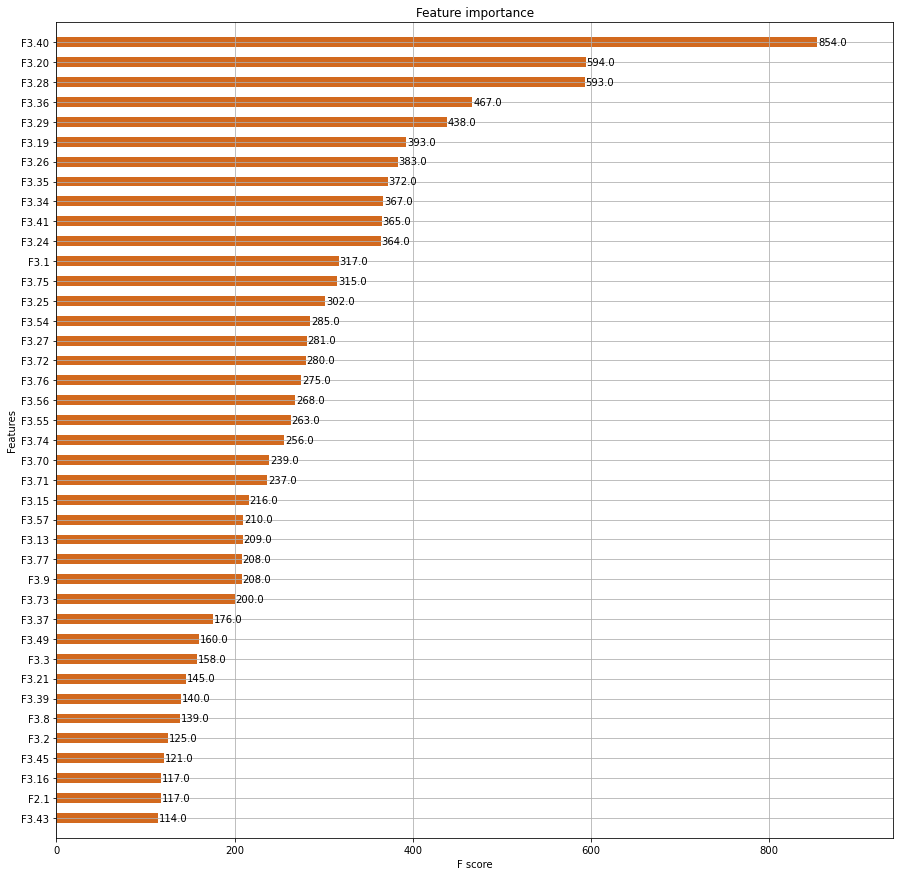

In [33]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(data_train_booster,height=0.5,ax=ax,max_num_features=40,color='chocolate')
plt.show()